# Atividade 01 - Parte 01: Inventário de emissões utilizando Python


#### Alunos: Matheus Henrique Lourenço de Oliveira (19205617) e Mayara Dargas Sousa (20203642)

# Etapa 01: Introdução

O presente estudo tem o objetivo de realizar uma estimativa das emissões de Material Particulado (PM), Óxidos de Nitrogênio (NOx), Dóxido de Enxofre (SO2) e Dióxido de carbono (CO2) com base em dados do Relatório de ESG do grupo MOHAWK, o qual a marca Eliane revestimentosfaz parte. Foi utilizado o capítulo 11.7 da AP42, pois o empreendimento trata-se de uma Indústria de Revestimentos Cerâmicos (https://www.epa.gov/sites/default/files/2020-10/documents/c11s07.pdf).

Os valores descritos na tabela seguir apresenta os fatores de emissão fornecidos pela AP-42, os quais foram convertidos de lb/ton para kg/ton, conforme instruções da Ap-42. Para o dióxido de enxofre (SO2), foi adotado o valor citado na referência: "Reference 10. For facilities using raw material with a sulfur content greater than 0.07 percent. The variable S represents the raw material sulfur content (percent). For facilities using raw material with a sulfur content less than or equal to 0.07 percent, use 9.5 S lb/ton to estimate emissions.”

## Fluxograma do processo produtivo

In [1]:
import matplotlib.pyplot as plt

# Caminho para a imagem no seu computador
caminho_imagem = 'C:\\Users\\mayar\\Downloads\\Captura de tela 2024-05-03 221653.png' 

# Carregar a imagem usando plt.imread()
imagem = plt.imread(caminho_imagem)

# Exibir a imagem usando plt.imshow()
plt.imshow(imagem)
plt.axis('off')  # Oculta os eixos

# Adicionar legenda
plt.text(0.5, -0.05, 'Figura 01. Fluxograma do processo de fabricação de produtos cerâmicos. (Fonte: USEPA)',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mayar\\Downloads\\Captura de tela 2024-05-03 221653.png'

# Etapa 02: Planilha de fatores de emissões compilada

In [2]:
import pandas as pd
import os
from IPython.display import display

# Coletando o caminho da pasta que estamos
caminho_atual = os.getcwd()

# Definindo o caminho da pasta dos fatores de emissão
caminho_fe = os.path.join(caminho_atual, 'tabelas', 'FE')

# Indicando o número do capítulo e subcapítulo
capitulo = 11
subcapitulo = 7

# Construindo o nome do arquivo
nome_arquivo = f'chp_{capitulo}_{subcapitulo}.csv'

# Caminho completo do arquivo
caminho_arquivo = os.path.join(caminho_fe, nome_arquivo)

# Abrindo o arquivo utilizando o Pandas
fe = pd.read_csv(caminho_arquivo)

# Estilizando a planilha com cores alternadas para as linhas e colunas
styled_fe = fe.style.set_properties(**{'text-align': 'center'}) \
                     .set_table_styles([
                         {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
                         {'selector': 'tr:nth-child(odd)', 'props': [('background-color', 'white')]},
                         {'selector': 'th', 'props': [('background-color', '#e6e6e6')]},
                         {'selector': 'td', 'props': [('background-color', 'white')]}
                     ])

# Exibindo a planilha estilizada na tela
display(styled_fe)


,Source,PM,SO2,NOX
0,Comminution,0.060000,nan,nan
1,Dryer,1.150000,nan,nan
2,Cooler,0.055000,nan,nan
3,Granulation,0.095000,nan,nan
4,Firing natural gas,0.245000,4.750000,0.270000
5,Refiring natural gas,0.033500,nan,nan
6,Ceramic glaze spray booth,0.900000,nan,nan


## Estimativa da produção: premissas adotadas e valores fornecidos

Conforme dados institucionais de 2021, a Eliane revestimentos produz 40.8 milhões de m² de revestimento por ano, distribuídos em 6 unidades em todo o Brasil. Assumindo a premissa de que cada unidade produz a mesma quantidade, a unidade de interesse, em Criciúma - SC, produziria aproximadamente 6.8 milhões de m² de revestimento.

Além disso, de modo a estimar este valor em toneladas, foram utilizados os valores de peso e medida do modelo mais vendido da fábrica, o porcelanato Bianco plus NA 60X60 com as seguintes especificações técnicas:

- Peso da caixa: 30,38 kg
- Rendimento: 1,44 m²

Portanto, se: 

30,38 kg ----- 1,44 m² 

   X     ----- 6.8 x 10^6 m²

X = 143.46111 x 10^6 kg = 143461,11 toneladas/ano 

ou então, 

11955,09 toneladas/mês  e 393,04 ton/dia. Também assumindo a premissa de uma escala produtiva uniforma ao longo do ano.

## Plotando os fatores de emissão

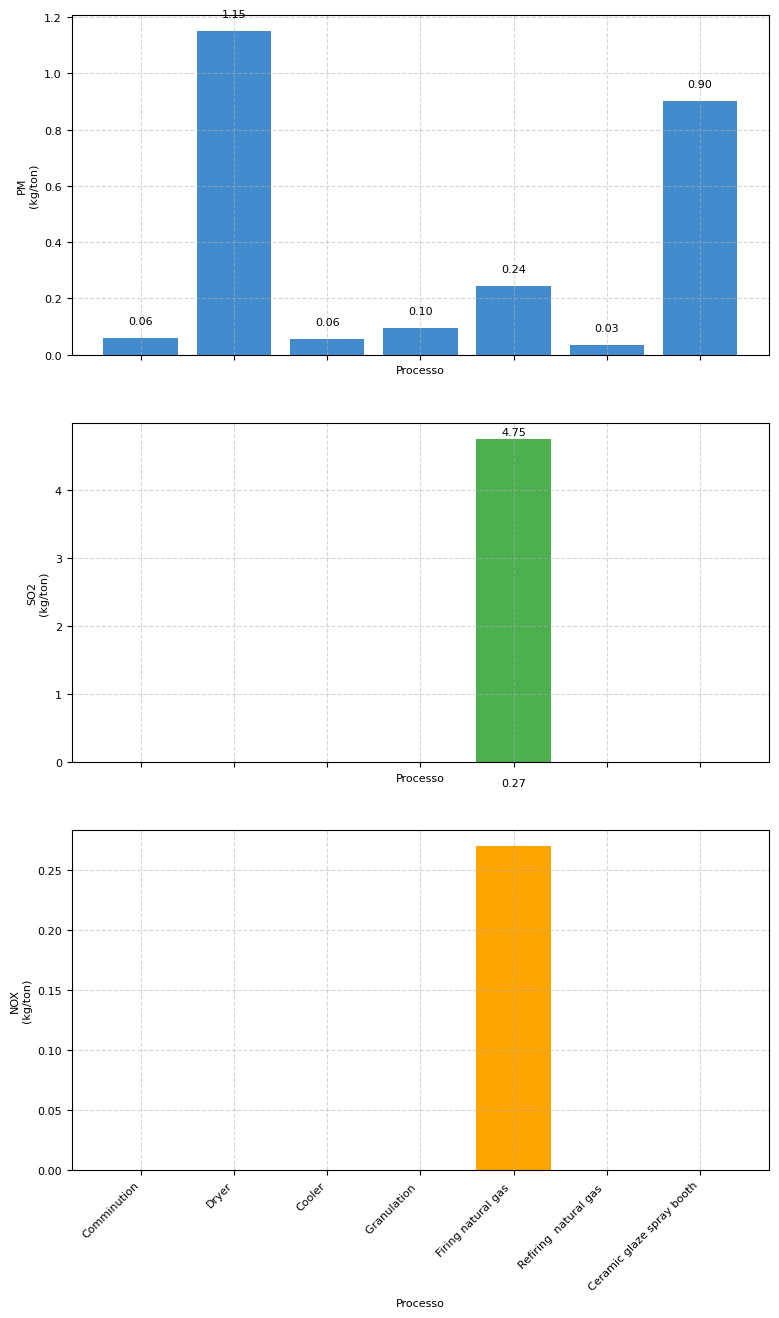

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Definindo as cores para cada poluente
cores = ['#428CCD', '#4CAF50', '#FFA500']

# Criando a figura com Matplotlib
fig, ax = plt.subplots(len(fe.columns) - 1, 1, sharex=True, figsize=(9, 15))

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1, len(fe.columns)):
    ax[ii - 1].bar(fe['Source'], fe.iloc[:, ii], color=cores[ii-1])  # Passa a cor correspondente para cada gráfico
    ax[ii - 1].set_xlabel('Processo', fontsize=8)
    ax[ii - 1].set_ylabel(fe.columns[ii] + '\n(kg/ton)', fontsize=8)
    ax[ii - 1].tick_params(axis='x', labelsize=8)
    ax[ii - 1].tick_params(axis='y', labelsize=8)
    ax[ii - 1].set_xticks(fe['Source'].index)
    ax[ii - 1].set_xticklabels(fe['Source'], rotation=45, ha='right', fontsize=8)
    ax[ii - 1].grid(True, linestyle='--', alpha=0.5)

    for x, y in zip(fe['Source'], fe.iloc[:, ii]):
        if np.isfinite(y):
            ax[ii - 1].text(x, y + 0.05, f'{y:.2f}', ha='center', fontsize=8)

# Salva a figura na pasta figures
fig.savefig('./figures/barplot_fatorEmiss.png')

plt.show()


## Processo do empreendimento que possui maior emissão

Não é possível avaliar de forma precisa qual o processo do empreendimento possui maior emissãodevido a ausência de valores de fatores de emissão para todos os processos mencionados. Entretanto, se for avaliado apenas a emissão de partículado, o processo que possui a maior emissão ao longo de um ano é a o secador ou "dryer".

# Etapa 03: Criando taxa de atividade aleatória com sazonalidade

Considerando que há apenas um dado anual disponível, a taxa de atividade foi convertida para toneladas por dia, resultando em um valor de aproximadamente 393,04 ton/dia. Reconhecendo que a produção não é um valor constante e que a produtividade pode variar de um dia para outro, será considerado um cenário hipotético. Onde a taxa de atividade é calculada estipulando uma faixa de valores a partir de atividades máximas e mínimas, em que foi considerado uma variação de 393,04 ±0,5 ton/dia.


## Série temporal das emissões mensais do empreendimento

      Atividade
0    393.086329
1    393.287366
2    393.256836
3    393.033253
4    393.288567
..          ...
995  392.683973
996  393.002889
997  393.505566
998  393.456259
999  393.274855

[1000 rows x 1 columns]


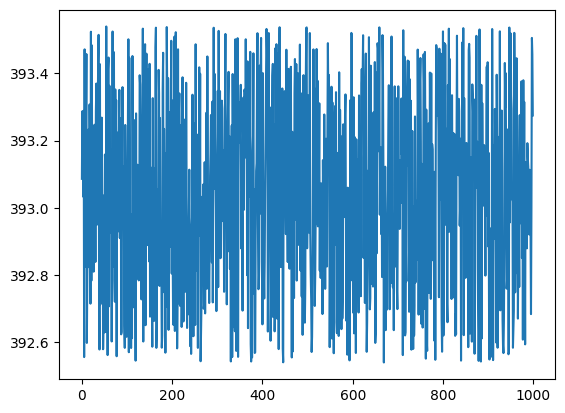

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Criando vetor de valores aleatórios
atvMax = 393.54
atvMin = 392.54
n = 1000
atv = (atvMax - atvMin) * np.random.rand(n) + atvMin
#print(atv)

# Exportando os dados para um arquivo .csv
output_folder = 'outputs'
output_file = 'dados_aleatorios.csv'
output_path = os.path.join(output_folder, output_file)

# Criando DataFrame com os dados aleatórios
df = pd.DataFrame({'Atividade': atv})
print(df)

# Criando uma figura com os valores aleatórios
fig, ax = plt.subplots()
ax.plot(atv)
plt.show()


In [5]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month


#criar um array de 1 a 365 e colocar igual a df['Dia']
df['Dia do Ano'] = df['Data'].dt.dayofyear  

# Mostrar o DataFrame resultante
print(df)


          Data  Mes  Dia do Ano
0   2024-01-01    1           1
1   2024-01-02    1           2
2   2024-01-03    1           3
3   2024-01-04    1           4
4   2024-01-05    1           5
..         ...  ...         ...
361 2024-12-27   12         362
362 2024-12-28   12         363
363 2024-12-29   12         364
364 2024-12-30   12         365
365 2024-12-31   12         366

[366 rows x 3 columns]


In [6]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
#print(atv)
print(df)


          Data  Mes  Dia do Ano   atividade
0   2024-01-01    1           1  392.726669
1   2024-01-02    1           2  392.944401
2   2024-01-03    1           3  392.986314
3   2024-01-04    1           4  393.124321
4   2024-01-05    1           5  393.031314
..         ...  ...         ...         ...
361 2024-12-27   12         362  392.711788
362 2024-12-28   12         363  393.118235
363 2024-12-29   12         364  393.404438
364 2024-12-30   12         365  393.536573
365 2024-12-31   12         366  392.912599

[366 rows x 4 columns]


<bound method NDFrame.to_csv of           Data  Mes  Dia do Ano   atividade  sazonalidade
0   2024-01-01    1           1  392.726669      1.999852
1   2024-01-02    1           2  392.944401      1.999407
2   2024-01-03    1           3  392.986314      1.998667
3   2024-01-04    1           4  393.124321      1.997630
4   2024-01-05    1           5  393.031314      1.996298
..         ...  ...         ...         ...           ...
361 2024-12-27   12         362  392.711788      1.998667
362 2024-12-28   12         363  393.118235      1.999407
363 2024-12-29   12         364  393.404438      1.999852
364 2024-12-30   12         365  393.536573      2.000000
365 2024-12-31   12         366  392.912599      1.999852

[366 rows x 5 columns]>

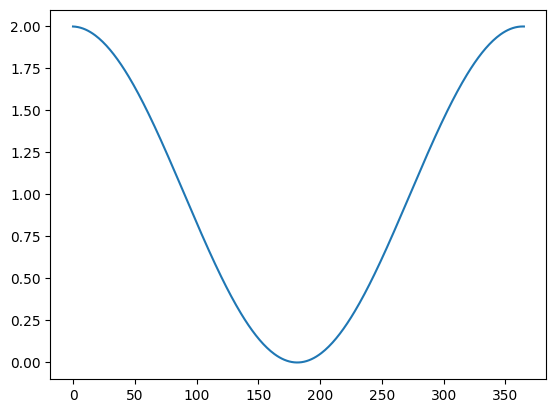

In [7]:
# Criando componente sazonal

sazonalidade = np.cos((2*np.pi)*df['Dia do Ano']/365)+1#taxa de papel produzido diariamente

df['sazonalidade'] = sazonalidade 
plt.plot(sazonalidade) 
df.to_csv

#print(sazonalidade)


## Variabilidade temporal da taxa de atividade

In [8]:
#Valores aleatórios com Monte Carlo
import numpy as np

# Gerando variabilidade usando o método Monte Carlo
df['aleatorio'] = (np.random.rand(len(df)) * (atvMax - atvMin) + atvMin)

#variabilidaede trocado por atividade 
df['aleatorioSazonal'] = df['atividade'] + df['sazonalidade'] 

# Calculando as médias
media_atividade = df['atividade'].mean()
media_sazonalidade = df['sazonalidade'].mean()
media_aleatorio = df['aleatorio'].mean()
media_aleatorio_sazonal = df['aleatorioSazonal'].mean()

# Imprimindo as médias
print("Média da atividade:", media_atividade)
print("Média da sazonalidade:", media_sazonalidade)
print("Média da componente aleatória:", media_aleatorio)
print("Média da componente aleatória + sazonalidade:", media_aleatorio_sazonal)
print(' ')

#A média da componaente aleatória mais a média da componente sazonal tem que dar a média da taxa de atividade diária

# Salvando o DataFrame em um arquivo CSV dentro da pasta "outputs"
output_folder = 'outputs/'
output_filename = 'dataframe_output.csv'
df.to_csv(output_folder + output_filename, index=False)

print (df)

Média da atividade: 393.0531357178648
Média da sazonalidade: 1.0027318356262545
Média da componente aleatória: 393.0536233533544
Média da componente aleatória + sazonalidade: 394.05586755349105
 
          Data  Mes  Dia do Ano   atividade  sazonalidade   aleatorio  \
0   2024-01-01    1           1  392.726669      1.999852  393.403063   
1   2024-01-02    1           2  392.944401      1.999407  392.924561   
2   2024-01-03    1           3  392.986314      1.998667  392.785574   
3   2024-01-04    1           4  393.124321      1.997630  392.662168   
4   2024-01-05    1           5  393.031314      1.996298  393.241083   
..         ...  ...         ...         ...           ...         ...   
361 2024-12-27   12         362  392.711788      1.998667  392.700295   
362 2024-12-28   12         363  393.118235      1.999407  393.020019   
363 2024-12-29   12         364  393.404438      1.999852  392.618532   
364 2024-12-30   12         365  393.536573      2.000000  392.711430   
3

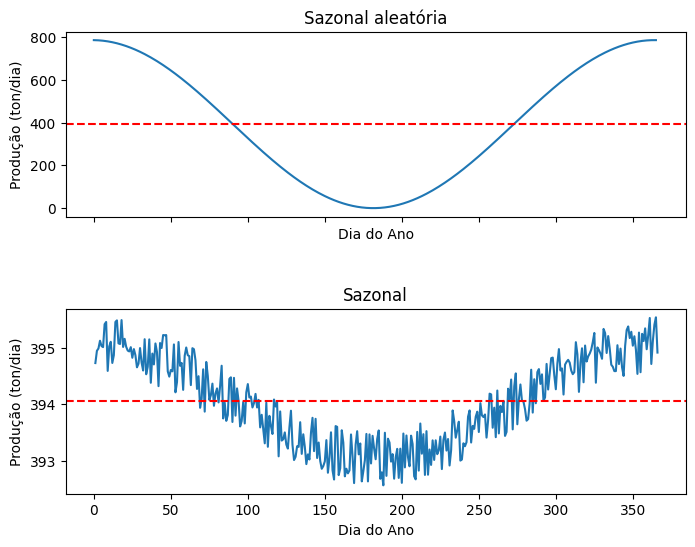

In [9]:
import matplotlib.pyplot as plt

# Calculando a média dos dados
mean_aleatorioSazonal = df['aleatorioSazonal'].mean()
mean_sazonalidade_atividade = (df['sazonalidade'] * df['atividade'].mean()).mean()

# Plotando os gráficos com espaço entre eles
fig, ax = plt.subplots(2, figsize=(8, 6), sharex=True, gridspec_kw={'hspace': 0.5})


# Plotando os dados de 'aleatorioSazonal' versus 'Dia do Ano' na segunda subplot
ax[1].plot(df['Dia do Ano'], df['aleatorioSazonal'])
# Adicionando a linha média na segunda subplot
ax[1].axhline(y=mean_aleatorioSazonal, color='r', linestyle='--')
# Definindo os títulos dos eixos e do gráfico 2
ax[1].set_xlabel('Dia do Ano')
ax[1].set_ylabel('Produção (ton/dia)')
ax[1].set_title('Sazonal')

# Plotando os dados de 'sazonalidade' * média de 'atividade' na primeira subplot
ax[0].plot(df['sazonalidade'] * df['atividade'].mean())
# Adicionando a linha média na primeira subplot
ax[0].axhline(y=mean_sazonalidade_atividade, color='r', linestyle='--')
# Definindo os títulos dos eixos e do gráfico 1
ax[0].set_xlabel('Dia do Ano')
ax[0].set_ylabel('Produção (ton/dia)')
ax[0].set_title('Sazonal aleatória')

plt.show()

Através da análise dos gráficos, pôde-se constatar que a taxa de atividade "Sazonal aleatória" é consistentemente superior àquela que leva em consideração uma sazonalidade aleatória. Isso ocorre porque os valores da primeira mantêm um comportamento estável ao longo do ano. Os valores de média obtidos estão descrito abaixo, não foi possível modelar a sazonalidade com a máxima precisão.
- Média da atividade: 393.0390704514687
- Média da sazonalidade: 1.0027318356262545
- Média da componente aleatória: 393.041965382669
- Média da componente aleatória + sazonalidade: 394.04180228709504

# Etapa 04: Estimando emissões

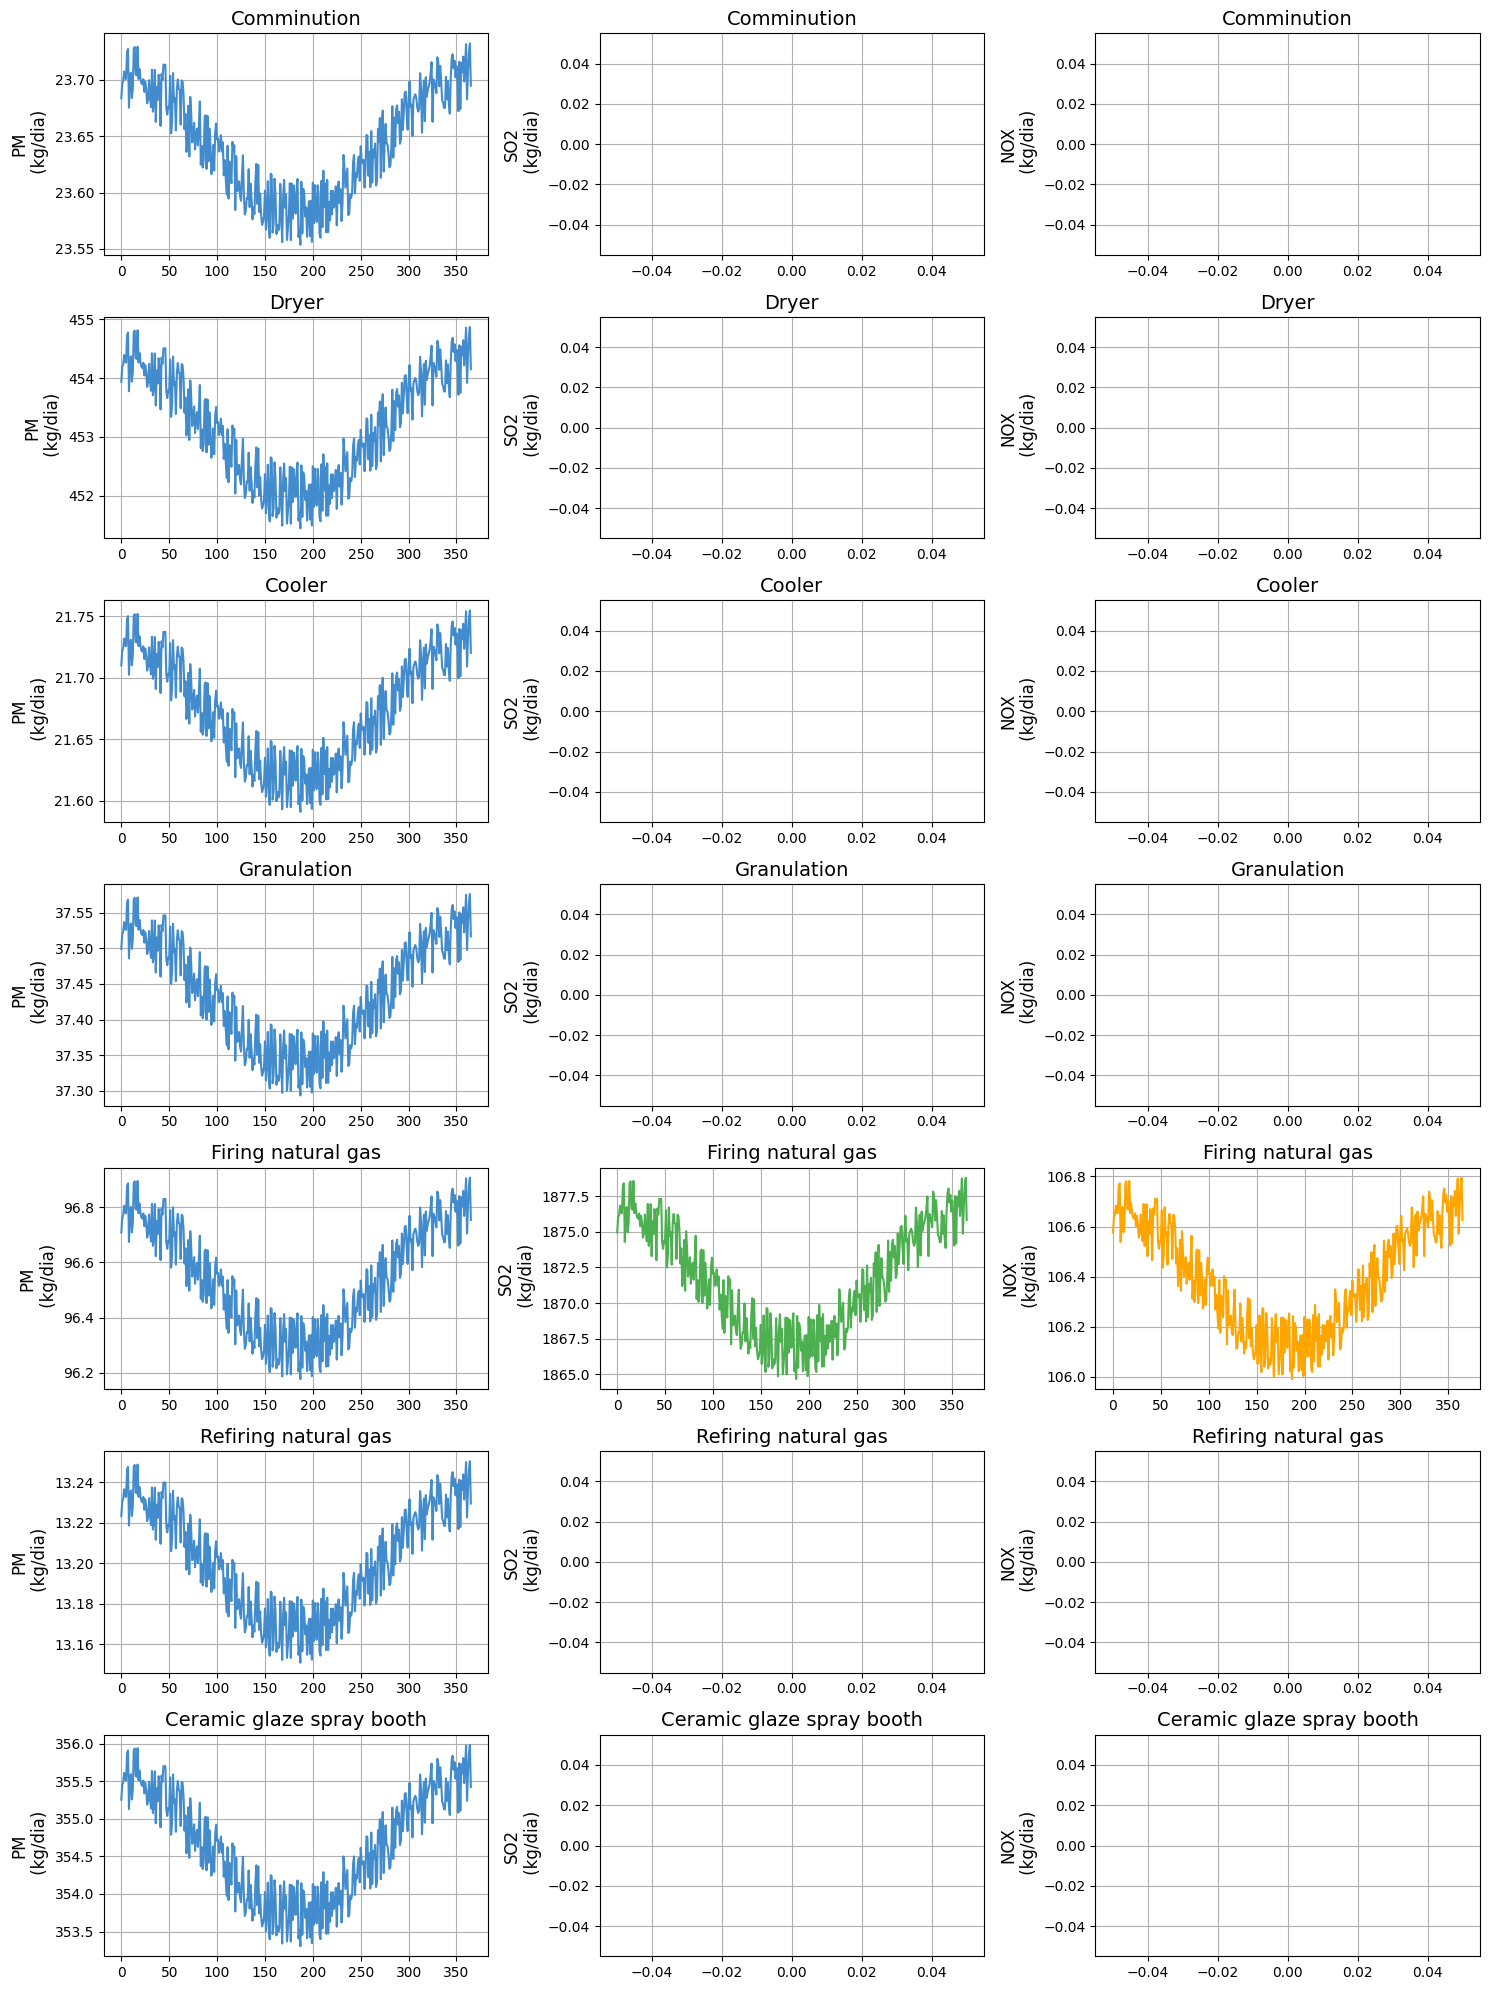

In [10]:
import matplotlib.pyplot as plt

# Definindo as cores para cada gás
cores = {'PM': '#428CCD', 'SO2':'#4CAF50', 'NOx':'#FFA500'}

# Definindo os processos e seus respectivos títulos
processos = [
    ('Comminution', 0),
    ('Dryer', 1),
    ('Cooler', 2),
    ('Granulation', 3),
    ('Firing natural gas', 4),
    ('Refiring natural gas', 5),
    ('Ceramic glaze spray booth', 6)
]

# Criando subplots para cada processo
fig, axs = plt.subplots(7, 3, figsize=(15, 20))
for idx, (processo, idx_fe) in enumerate(processos):
    for ii, (gas, cor) in enumerate(cores.items(), start=1):
        ax = axs[idx, ii-1]
        ax.plot(df.index, df['aleatorioSazonal']*fe.iloc[idx_fe, ii], color=cor)
        ax.set_ylabel(fe.columns[ii]+'\n (kg/dia)', fontsize=12)
        ax.set_title(processo, fontsize=14)  # Adicionando o título do processo em cada gráfico
        ax.grid(True)  # Adicionando linhas de grade
plt.tight_layout()
plt.show()


Os gráficos acima mostram a variação das emissões de PM, SO2 e NOx ao longo de um ano de operação, considerando a variabilidade das emissões ao longo das horas do dia para cada processo industrial específico. É importante destacar que devido à falta de dados, nem todos os processos descritos na indústria puderam ser avaliados de maneira igualitária.

Como já mencionado anteriormente, em relação apenas à emissão de PM, o processo que apresenta os maiores níveis de emissão é o "Dryer". No entanto, é importante ressaltar que o processo de "Firing natural gas" demonstra níveis elevados de SO2.

A avaliação diária das emissões de poluentes é crucial para entender a variabilidade ao longo do tempo e condições operacionais, permitindo a identificação de padrões sazonais, detecção de eventos anormais, avaliação de medidas de controle, cumprimento de regulamentações e planejamento futuro.

## Emissões mensais

In [12]:
import matplotlib.pyplot as plt

# Definindo as cores para cada poluente
cores = ['#428CCD', '#4CAF50', '#FFA500']

# Transformar o dicionário 'emissoes_mensais' em um DataFrame
df_emissoes_mensais = pd.DataFrame(emissoes_mensais)

# Calcular a emissão total mensal para cada poluente
emissoes_mensais_total = df_emissoes_mensais.copy()  # Criar uma cópia do DataFrame de emissões mensais

# Plotar os gráficos de emissão para cada poluente
for idx, poluente in enumerate(fe.columns[1:]):  # Usando enumerate para obter o índice da cor correspondente
    # Criar uma série pandas para armazenar a emissão mensal total para o poluente
    emissao_mensal_total = pd.Series(dtype='float64')
    
    # Somar as emissões de todos os processos para o poluente
    for col_name in emissoes_mensais_total.columns:
        if poluente in col_name:  # Verificar se o nome do poluente está no nome da coluna
            emissao_mensal_total = emissao_mensal_total.add(emissoes_mensais_total[col_name], fill_value=0)
    
    # Plotar o gráfico de emissão para o poluente com a cor correspondente
    plt.figure(figsize=(8, 2))
    plt.plot(emissao_mensal_total.index, emissao_mensal_total.values, color=cores[idx])
    plt.title(f'Emissão total de {poluente} ao longo dos meses')
    plt.xlabel('Mês')
    plt.ylabel('Emissão (kg)')
    plt.grid(True, linestyle='--', alpha=0.5)  # Adicionando linhas de grade
    plt.show()


NameError: name 'emissoes_mensais' is not defined

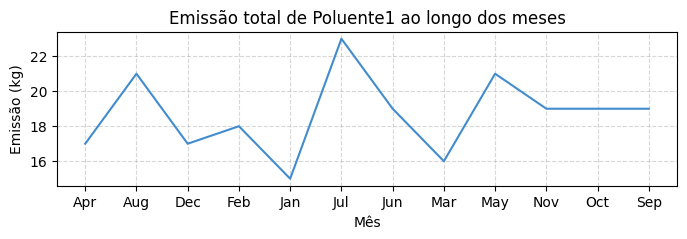

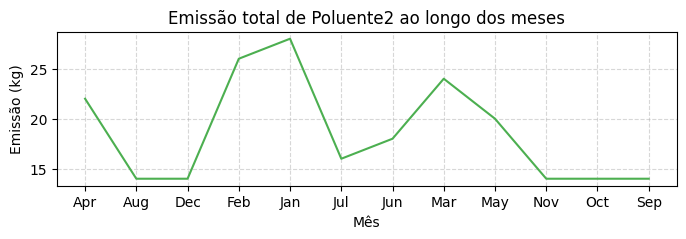

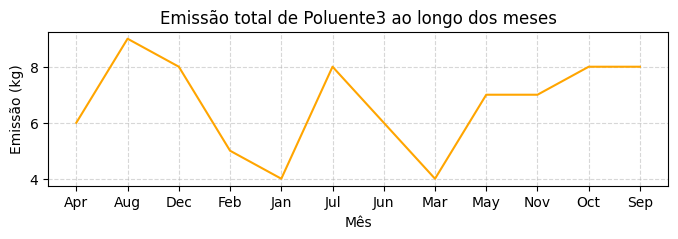

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo de dados de emissões mensais
emissoes_mensais = {
    'Mês': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'Poluente1_Processo1': [10, 12, 11, 10, 15, 14, 16, 15, 14, 13, 12, 11],
    'Poluente1_Processo2': [5, 6, 5, 7, 6, 5, 7, 6, 5, 6, 7, 6],
    'Poluente2_Processo1': [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9],
    'Poluente2_Processo2': [8, 7, 6, 5, 4, 3, 2, 1, 2, 3, 4, 5],
    'Poluente3_Processo1': [3, 4, 3, 4, 5, 4, 5, 6, 5, 4, 3, 4],
    'Poluente3_Processo2': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]
}

# Definindo as cores para cada poluente
cores = ['#428CCD', '#4CAF50', '#FFA500']

# Transformar o dicionário 'emissoes_mensais' em um DataFrame
df_emissoes_mensais = pd.DataFrame(emissoes_mensais)

# Adicionar a coluna 'Mês' como índice
df_emissoes_mensais.set_index('Mês', inplace=True)

# Simular a definição de 'fe.columns' para corresponder aos poluentes
fe_columns = ['Mês', 'Poluente1', 'Poluente2', 'Poluente3']

# Calcular a emissão total mensal para cada poluente
emissoes_mensais_total = df_emissoes_mensais.copy()  # Criar uma cópia do DataFrame de emissões mensais

# Plotar os gráficos de emissão para cada poluente
for idx, poluente in enumerate(fe_columns[1:]):  # Usando enumerate para obter o índice da cor correspondente
    # Criar uma série pandas para armazenar a emissão mensal total para o poluente
    emissao_mensal_total = pd.Series(dtype='float64')
    
    # Somar as emissões de todos os processos para o poluente
    for col_name in emissoes_mensais_total.columns:
        if poluente in col_name:  # Verificar se o nome do poluente está no nome da coluna
            emissao_mensal_total = emissao_mensal_total.add(emissoes_mensais_total[col_name], fill_value=0)
    
    # Plotar o gráfico de emissão para o poluente com a cor correspondente
    plt.figure(figsize=(8, 2))
    plt.plot(emissao_mensal_total.index, emissao_mensal_total.values, color=cores[idx])
    plt.title(f'Emissão total de {poluente} ao longo dos meses')
    plt.xlabel('Mês')
    plt.ylabel('Emissão (kg)')
    plt.grid(True, linestyle='--', alpha=0.5)  # Adicionando linhas de grade
    plt.show()



Os gráficos acima representam as variações anuais das emissões, considerando a soma de cada processo e uma sazonalidade modelada com base na função cosseno. Essa modelagem sazonal é crucial para analisar as emissões de poluentes ao longo de um período prolongado, fornecendo uma compreensão mais precisa das tendências e dados mais robustos.

## Soma das emissões considerando todos os processos 

In [17]:
# Cálcula emissões para cada poluente
labels = ['PM', 'SO2', 'NOX']
for label in labels:
    # Obtém o índice do poluente no dataframe de fatores de emissão
    idx_poluente = fe.columns.get_loc(label)

    # Soma os fatores de emissão de cada processo para o poluente atual
    SomaFE = fe.iloc[:, idx_poluente].sum()

    # Calcula a emissão total do poluente
    emissSoma = round(df['aleatorioSazonal'].sum() * SomaFE, 2)

    # Imprime o resultado
    print(f'A soma das emissões de {label} foi de {emissSoma} kg')


A soma das emissões de PM foi de 366113.76 kg
A soma das emissões de SO2 foi de 685066.13 kg
A soma das emissões de NOX foi de 38940.6 kg


## Emissão média, mínima e máxima

In [18]:
import pandas as pd

# Calcular as emissões totais para cada combinação de processo e poluente
emissoes_totais = {}
for idx, processo in enumerate(fe['Source']):
    for poluente in fe.columns[1:]:
        # Multiplicar a produção diária pela emissão específica de cada poluente para cada processo
        col_name = f'{processo}_{poluente}'  # Criar um nome de coluna único para cada combinação de processo e poluente
        emissoes_totais[col_name] = df['aleatorioSazonal'] * fe.loc[idx, poluente]

# Transformar o dicionário em um DataFrame
df_emissoes_totais = pd.DataFrame(emissoes_totais)

# Calcular a emissão média, mínima e máxima para cada poluente
resultados_emissoes = {}
for poluente in fe.columns[1:]:
    # Criar uma série pandas para armazenar a emissão total para o poluente
    emissao_total = pd.Series(dtype='float64')
    
    # Iterar sobre as colunas do DataFrame de emissões totais
    for col_name in df_emissoes_totais.columns:
        if poluente in col_name:  # Verificar se o nome do poluente está no nome da coluna
            # Adicionar as emissões para o poluente atual
            emissao_total = emissao_total.add(df_emissoes_totais[col_name], fill_value=0)
    
    # Calcular a emissão média, mínima e máxima
    emissao_media = emissao_total.mean()  # Média das emissões totais
    emissao_minima = emissao_total.min()  # Mínima das emissões totais
    emissao_maxima = emissao_total.max()  # Máxima das emissões totais
    
    # Armazenar os resultados para o poluente atual
    resultados_emissoes[poluente] = {
        'Emissão Média (g/s)': emissao_media,
        'Emissão Mínima (g/s)': emissao_minima,
        'Emissão Máxima (g/s)': emissao_maxima
    }

# Exibe os resultados para cada poluente
for poluente, resultados in resultados_emissoes.items():
    print(f"Resultados para o poluente '{poluente}':")
    for chave, valor in resultados.items():
        print(f"{chave}: {valor} ")
    print()  # Adiciona uma linha em branco após cada conjunto de resultados


Resultados para o poluente 'PM':
Emissão Média (g/s): 1000.3108197845369 
Emissão Mínima (g/s): 996.5181218559003 
Emissão Máxima (g/s): 1004.0695917785495 

Resultados para o poluente 'SO2':
Emissão Média (g/s): 1871.7653708790822 
Emissão Mínima (g/s): 1864.6685360707215 
Emissão Máxima (g/s): 1878.7987240291943 

Resultados para o poluente 'NOX':
Emissão Média (g/s): 106.39508423944257 
Emissão Mínima (g/s): 105.99168520823049 
Emissão Máxima (g/s): 106.79487483955421 



In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrando os resultados para cada poluente individualmente
df_pm = df_resultados_emissoes.loc['PM']
df_so2 = df_resultados_emissoes.loc['SO2']
df_nox = df_resultados_emissoes.loc['NOX']

# Criando uma grade de subplots com uma linha e três colunas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotando o boxplot para o poluente PM no primeiro subplot (azul)
sns.boxplot(data=df_pm, ax=axes[0], color='#428CCD')
axes[0].set_title('')
axes[0].set_xlabel('Distribuição das Emissões de PM')
axes[0].set_ylabel('Emissão (g/s)')
axes[0].grid(True)

# Plotando o boxplot para o poluente SO2 no segundo subplot (verde)
sns.boxplot(data=df_so2, ax=axes[1], color='#4CAF50')
axes[1].set_title('')
axes[1].set_xlabel('Distribuição das Emissões de SO2')
axes[1].set_ylabel('Emissão (g/s)')
axes[1].grid(True)

# Plotando o boxplot para o poluente NOx no terceiro subplot (laranja)
sns.boxplot(data=df_nox, ax=axes[2], color='#FFA500')
axes[2].set_title('')
axes[2].set_xlabel('Distribuição das Emissões de NOX')
axes[2].set_ylabel('Emissão (g/s)')
axes[2].grid(True)

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()


NameError: name 'df_resultados_emissoes' is not defined

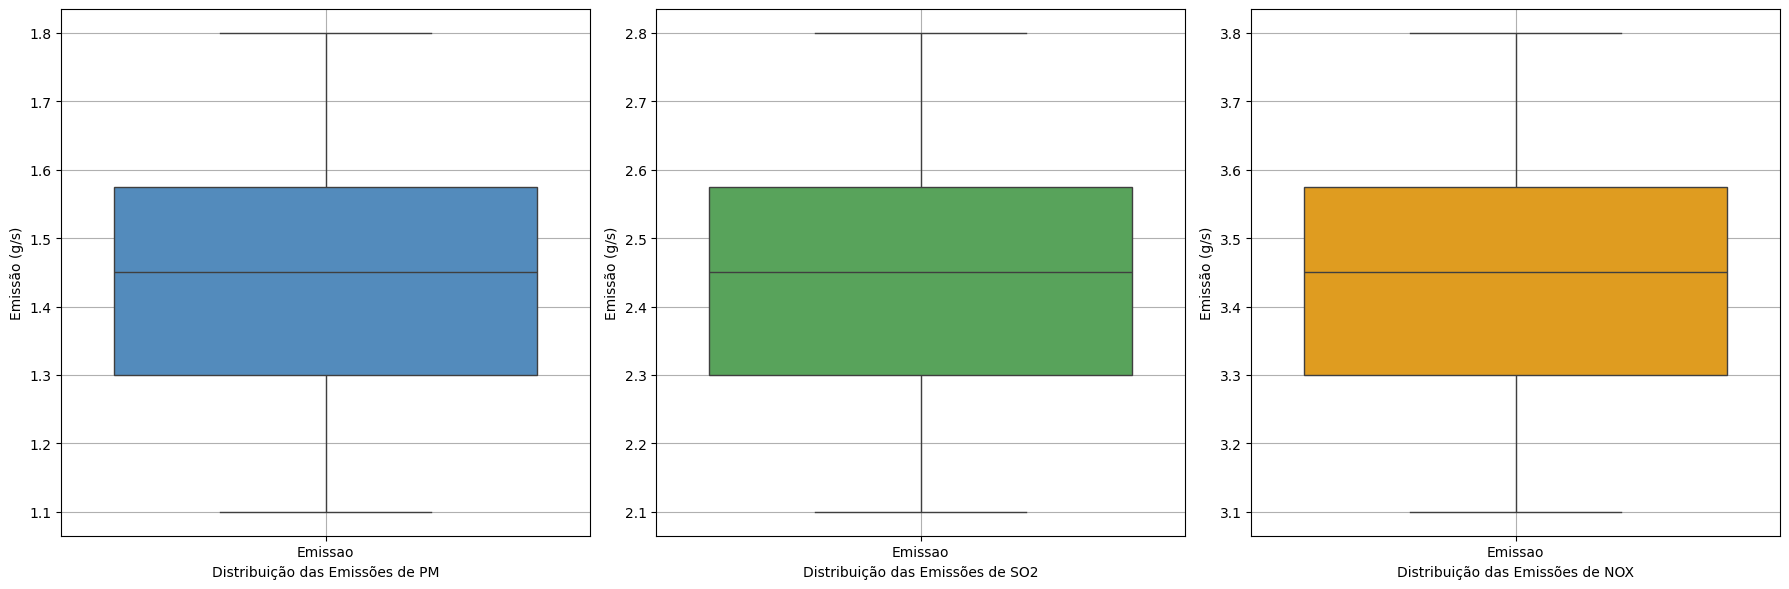

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criando um DataFrame de exemplo para df_resultados_emissoes
data = {
    'Poluente': ['PM'] * 10 + ['SO2'] * 10 + ['NOX'] * 10,
    'Emissao': [1.1, 1.3, 1.2, 1.5, 1.3, 1.4, 1.6, 1.8, 1.5, 1.7,
                2.1, 2.3, 2.2, 2.5, 2.3, 2.4, 2.6, 2.8, 2.5, 2.7,
                3.1, 3.3, 3.2, 3.5, 3.3, 3.4, 3.6, 3.8, 3.5, 3.7]
}
df_resultados_emissoes = pd.DataFrame(data)

# Configurando o DataFrame para ter 'Poluente' como índice
df_resultados_emissoes.set_index('Poluente', inplace=True)

# Filtrando os resultados para cada poluente individualmente
df_pm = df_resultados_emissoes.loc['PM']
df_so2 = df_resultados_emissoes.loc['SO2']
df_nox = df_resultados_emissoes.loc['NOX']

# Criando uma grade de subplots com uma linha e três colunas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotando o boxplot para o poluente PM no primeiro subplot (azul)
sns.boxplot(data=df_pm, ax=axes[0], color='#428CCD')
axes[0].set_title('')
axes[0].set_xlabel('Distribuição das Emissões de PM')
axes[0].set_ylabel('Emissão (g/s)')
axes[0].grid(True)

# Plotando o boxplot para o poluente SO2 no segundo subplot (verde)
sns.boxplot(data=df_so2, ax=axes[1], color='#4CAF50')
axes[1].set_title('')
axes[1].set_xlabel('Distribuição das Emissões de SO2')
axes[1].set_ylabel('Emissão (g/s)')
axes[1].grid(True)

# Plotando o boxplot para o poluente NOx no terceiro subplot (laranja)
sns.boxplot(data=df_nox, ax=axes[2], color='#FFA500')
axes[2].set_title('')
axes[2].set_xlabel('Distribuição das Emissões de NOX')
axes[2].set_ylabel('Emissão (g/s)')
axes[2].grid(True)

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()


Boxplots são uma ferramenta eficaz para visualizar distribuições estatísticas de dados, como medianas, quartis e intervalos interquartis (IQR). Neste contexto específico, os boxplots representam a distribuição das emissões de PM, SO2 e NOx provenientes de diferentes processos industriais.

A linha central representa a emissão média de cada poluente. Os limites superior e inferior do retângulo mostram o primeiro e terceiro quartis dos dados, destacando a dispersão central das emissões. Outliers pontos fora das linhas verticais, representam valores que estão significativamente longe dos outros valores. Podem indicar condições especiais ou erros nas medições.

Pode-se observar que os valores mínimos e máximos de emissão que mais diferem significativamente do valor médio estão relacionados ao SO2, indicando uma distribuição menos uniforme. Essa observação é importante e pode indicar o comportamento diferenciado das fontes ou processos que emitem esse poluente. Por outro lado, os valores de emissão de PM e NOx variaram menos em relação aos valores médios.

### Referências

- https://mohawkind.com/_pdf/Eliane_2022_ESG_PT.pdf
- https://www.eliane.com/institucional
- https://www.eliane.com/produtos/bianco-plus-na-60x60-sc-8017071
- https://repositorio.ipea.gov.br/bitstream/11058/1578/1/td_1606.pdf
- https://periodicos.uem.br/ojs/index.php/Percurso/article/view/49613